100%|██████████| 6.25M/6.25M [00:00<00:00, 10.2MB/s]



0: 256x640 3 persons, 2 bicycles, 1 bus, 247.4ms
Speed: 3.7ms preprocess, 247.4ms inference, 1578.0ms postprocess per image at shape (1, 3, 256, 640)


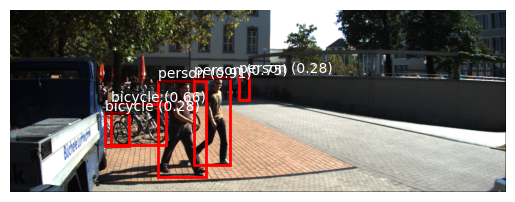

In [1]:
import torch
from ultralytics import YOLO
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

# Step 1: Load a pretrained YOLOv8 model
model = YOLO("yolov8n.pt")  # using YOLOv8n for faster inference; you can change to yolov8s.pt or yolov8m.pt for better accuracy

# Function to visualize detections with semi-transparent labels
def plot_detections(img, results):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax = plt.gca()
    for result in results:
        box = result['box']
        label = result['label']
        confidence = result['confidence']
        
        # Draw rectangle and label
        rect = plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, color="red", linewidth=2)
        ax.add_patch(rect)
        
        # Semi-transparent background for text
        text_x, text_y = box[0], box[1]
        text = f"{label} ({confidence:.2f})"
        
        # Add a semi-transparent rectangle as the background
        bg_rect = plt.Rectangle((text_x, text_y - 12), width=100, height=16, color="black", alpha=0.5)
        ax.add_patch(bg_rect)
        
        # Add text on top of the rectangle
        plt.text(text_x, text_y, text, color="white", fontsize=10, verticalalignment="bottom")

    plt.axis("off")
    plt.show()

# Step 2: Test the pretrained model on a sample image
def test_model_on_image(model, image_path):
    img = cv2.imread(image_path)
    results = model(img)  # Inference
    processed_results = [
        {
            'box': [int(b) for b in box.xyxy[0].tolist()],
            'label': model.names[int(box.cls[0])],
            'confidence': box.conf[0].item()
        }
        for box in results[0].boxes
        if model.names[int(box.cls[0])] in ["person", "car", "bicycle"]  # Only display relevant classes
    ]
    plot_detections(img, processed_results)

# Test the pretrained model on your custom image
test_image_path = "/home/teitur/perception/Project/34759_final_project_raw/seq_01/image_02/data/0000000000.png"
test_model_on_image(model, test_image_path)



image_directory = "/home/teitur/perception/Project/34759_final_project_raw/seq_01/image_02/data"

# loading the image results and displaying them as a video

def images_to_video(image_dir, video_path, fps=30):
    images = [img for img in os.listdir(image_dir) if img.endswith(".png")]
    frame = cv2.imread(os.path.join(image_dir, images[0]))
    height, width, layers = frame.shape

    video = cv2.VideoWriter(video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    for image in images:
        video.write(cv2.imread(os.path.join(image_dir, image)))

    cv2.destroyAllWindows()
    video.release()

# Convert the images to a video
video_path = "output.mp4"
images_to_video(image_directory, video_path, fps=30)




In [7]:
import torch
from ultralytics import YOLO
import cv2
import os
import numpy as np

# Load the pretrained YOLOv8 model
model = YOLO("yolov8n.pt")  # Using YOLOv8n for faster inference; adjust for accuracy

# Visualize detections on the frame
def draw_detections(img, results):
    for result in results:
        box = result['box']
        label = result['label']
        confidence = result['confidence']

        # Draw rectangle and label with semi-transparent background
        cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), (0, 0, 255), 2)
        label_text = f"{label} ({confidence:.2f})"
        
        # Draw a semi-transparent background for text
        overlay = img.copy()
        cv2.rectangle(overlay, (box[0], box[1] - 20), (box[0] + len(label_text) * 10, box[1]), (0, 0, 0), -1)
        cv2.addWeighted(overlay, 0.5, img, 0.5, 0, img)
        
        # Display label text
        cv2.putText(img, label_text, (box[0], box[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
    return img

# Process images and store the annotated frames in a list
def process_images_and_store_results(model, image_dir, num_images=5):
    frames_with_detections = []
    for i in range(num_images):
        image_path = f"{image_dir}/{str(i).zfill(10)}.png"  # Ensures i is zero-padded to 10 digits
        img = cv2.imread(image_path)

        
        # Run inference on the image
        results = model(img)
        processed_results = [
            {
                'box': [int(b) for b in box.xyxy[0].tolist()],
                'label': model.names[int(box.cls[0])],
                'confidence': box.conf[0].item()
            }
            for box in results[0].boxes
            if model.names[int(box.cls[0])] in ["person", "car", "bicycle"]
        ]
        
        # Draw detections on the image
        annotated_img = draw_detections(img, processed_results)
        frames_with_detections.append(annotated_img)
    return frames_with_detections

# Create video from frames stored in the list
def create_video_from_frames(frames, video_path, fps=30):
    height, width, layers = frames[0].shape
    video = cv2.VideoWriter(video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    for frame in frames:
        video.write(frame)

    video.release()

# Define the image directory and run the detection-to-video pipeline
image_directory = "/home/teitur/perception/Project/34759_final_project_raw/seq_01/image_02/data"
num_images = 144
processed_frames = process_images_and_store_results(model, image_directory, num_images)

# Convert processed frames to video
video_path = "output.mp4"
create_video_from_frames(processed_frames, video_path, fps=30)



0: 256x640 3 persons, 2 bicycles, 1 bus, 12.7ms
Speed: 1.9ms preprocess, 12.7ms inference, 3.3ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 4 persons, 1 bicycle, 1 bus, 12.4ms
Speed: 2.1ms preprocess, 12.4ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 1 bicycle, 1 bus, 13.3ms
Speed: 2.4ms preprocess, 13.3ms inference, 8.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 3 bicycles, 1 bus, 16.2ms
Speed: 1.7ms preprocess, 16.2ms inference, 3.3ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 3 persons, 3 bicycles, 1 bus, 1 truck, 28.4ms
Speed: 2.9ms preprocess, 28.4ms inference, 3.2ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 3 bicycles, 1 bus, 1 truck, 35.9ms
Speed: 3.3ms preprocess, 35.9ms inference, 13.3ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 3 persons, 2 bicycles, 1 bus, 1 truck, 12.2ms
Speed: 2.2ms preprocess, 12.2ms inference, 2.9ms 

In [9]:
import cv2
import numpy as np
from ultralytics import YOLO
import os

# Load a pretrained YOLOv8 model
model = YOLO("yolov8n.pt")

# Parameters
MAX_DISTANCE = 100  # Distance to associate detections with existing tracked objects
INITIAL_MAX_MISSING_FRAMES = 5  # Maximum allowed frames for which an object can be undetected

# Kalman filter functions
def update(x, P, Z, H, R):
    y = Z - np.dot(H, x)  # Measurement residual
    S = np.dot(H, np.dot(P, H.T)) + R  # Residual covariance
    K = np.dot(P, np.dot(H.T, np.linalg.inv(S)))  # Kalman gain
    x = x + np.dot(K, y)  # Updated state
    P = np.dot(np.eye(len(P)) - np.dot(K, H), P)  # Updated uncertainty
    return x, P

def predict(x, P, F, u):
    x = np.dot(F, x) + u  # Predicted state
    P = np.dot(F, np.dot(P, F.T))  # Predicted uncertainty
    return x, P

# Tracking class for each object
class ObjectTracker:
    def __init__(self, x, P, obj_type):
        self.x = x  # State (position and velocity)
        self.P = P  # Uncertainty
        self.obj_type = obj_type  # Type of object ('person', 'car', 'bicycle')
        self.missing_frames = 0  # Count frames where the object wasn't detected

# Initialize Kalman filter parameters
def initialize_kalman(init_x, init_y):
    x = np.array([[init_x], [0], [init_y], [0]])  # (x, vx, y, vy)
    P = np.eye(4) * 500  # High initial uncertainty
    return x, P

# Helper function to calculate distance between two points
def distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# Draw function
def draw_detections(frame, tracked_objects):
    for tracker in tracked_objects:
        pred_x, pred_y = int(tracker.x[0]), int(tracker.x[2])

        # Draw the predicted location in red if not detected
        if tracker.missing_frames > 0:
            cv2.circle(frame, (pred_x, pred_y), 5, (0, 0, 255), -1)  # Red for prediction only
        else:
            cv2.circle(frame, (pred_x, pred_y), 5, (255, 0, 0), -1)  # Blue if detected

        # Display object type and missing frames
        info_text = f"{tracker.obj_type} (Missing: {tracker.missing_frames})"
        cv2.putText(frame, info_text, (pred_x, pred_y - 15),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

# Process frames and track objects
def track_objects(model, image_dir, num_images):
    tracked_objects = []  # List of tracked objects
    u = np.zeros((4, 1))  # No external motion
    F = np.array([[1, 1, 0, 0],  # Transition matrix for constant velocity
                  [0, 1, 0, 0],
                  [0, 0, 1, 1],
                  [0, 0, 0, 1]])
    H = np.array([[1, 0, 0, 0],
                  [0, 0, 1, 0]])
    R = np.eye(2) * 10  # Measurement uncertainty

    for i in range(num_images):
        image_path = f"{image_dir}/{str(i).zfill(10)}.png"
        img = cv2.imread(image_path)

        # Detect objects in the image
        results = model(img)
        detections = [
            {
                'box': [int(b) for b in box.xyxy[0].tolist()],
                'label': model.names[int(box.cls[0])],
                'center': (int((box.xyxy[0][0] + box.xyxy[0][2]) / 2),
                           int((box.xyxy[0][1] + box.xyxy[0][3]) / 2))
            }
            for box in results[0].boxes
            if model.names[int(box.cls[0])] in ["person", "car", "bicycle"]
        ]

        # Associate detections with existing tracked objects or create new ones
        for detection in detections:
            det_center = detection['center']
            det_type = detection['label']
            matched_tracker = None

            # Check if detection matches any tracked object
            for tracker in tracked_objects:
                pred_center = (int(tracker.x[0]), int(tracker.x[2]))
                if tracker.obj_type == det_type and distance(pred_center, det_center) < MAX_DISTANCE:
                    matched_tracker = tracker
                    break

            if matched_tracker:
                # Update the matched tracker with new detection
                Z = np.array([[det_center[0]], [det_center[1]]])
                matched_tracker.x, matched_tracker.P = update(matched_tracker.x, matched_tracker.P, Z, H, R)
                matched_tracker.missing_frames = 0
            else:
                # Initialize a new tracker for unmatched detection
                init_x, init_y = det_center
                x, P = initialize_kalman(init_x, init_y)
                new_tracker = ObjectTracker(x, P, det_type)
                tracked_objects.append(new_tracker)

        # Predict next state for all tracked objects
        for tracker in tracked_objects:
            tracker.x, tracker.P = predict(tracker.x, tracker.P, F, u)
            tracker.missing_frames += 1  # Increment missing frame count

        # Remove objects that haven't been detected within allowed frames
        tracked_objects = [tracker for tracker in tracked_objects if tracker.missing_frames < INITIAL_MAX_MISSING_FRAMES]

        # Draw detections and predictions
        draw_detections(img, tracked_objects)

        # Display frame
        cv2.imshow("Object Tracking", img)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cv2.destroyAllWindows()

# Run tracking on images
image_directory = "/home/teitur/perception/Project/34759_final_project_raw/seq_01/image_02/data"
num_images = 140
track_objects(model, image_directory, num_images)



0: 256x640 3 persons, 2 bicycles, 1 bus, 26.5ms
Speed: 2.3ms preprocess, 26.5ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 4 persons, 1 bicycle, 1 bus, 13.3ms
Speed: 2.1ms preprocess, 13.3ms inference, 4.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 1 bicycle, 1 bus, 20.8ms
Speed: 4.1ms preprocess, 20.8ms inference, 7.1ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 3 bicycles, 1 bus, 19.2ms
Speed: 2.3ms preprocess, 19.2ms inference, 6.1ms postprocess per image at shape (1, 3, 256, 640)


/tmp/ipykernel_1359550/1247516729.py:98: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_center = (int(tracker.x[0]), int(tracker.x[2]))
/tmp/ipykernel_1359550/1247516729.py:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_x, pred_y = int(tracker.x[0]), int(tracker.x[2])
QObject::moveToThread: Current thread (0x56237b4f2d40) is not the object's thread (0x56237b587cf0).
Cannot move to target thread (0x56237b4f2d40)

QObject::moveToThread: Current thread (0x56237b4f2d40) is not the object's thread (0x56237b587cf0).
Cannot move to target thread (0x56237b4f2d40)

QObject::moveToThread: Current thread (0x56237b4f2d40) is not the objec


0: 256x640 3 persons, 3 bicycles, 1 bus, 1 truck, 15.0ms
Speed: 1.9ms preprocess, 15.0ms inference, 6.2ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 3 bicycles, 1 bus, 1 truck, 12.0ms
Speed: 2.2ms preprocess, 12.0ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 3 persons, 2 bicycles, 1 bus, 1 truck, 14.3ms
Speed: 4.1ms preprocess, 14.3ms inference, 5.1ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 2 bicycles, 1 bus, 11.1ms
Speed: 2.2ms preprocess, 11.1ms inference, 2.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 4 persons, 3 bicycles, 1 bus, 1 truck, 1 handbag, 13.6ms
Speed: 6.0ms preprocess, 13.6ms inference, 3.8ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 4 persons, 2 bicycles, 1 truck, 12.9ms
Speed: 4.2ms preprocess, 12.9ms inference, 2.7ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 6 persons, 3 bicycles, 1 truck, 14.9ms
Speed: 3.7ms preprocess,